## Goal: Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

# Step 1: Data Understanding 

In [1]:
# Importing usefull Libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

In [2]:
# Importing the data file 'Leads.csv' and saving it in 'df'

df = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking the shape of dataset

df.shape

(9240, 37)

In [4]:
# Checking all the different column names and doing preliminary check based upon question understanding.

df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# Getting a general overview of the values present in dataset.

df.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [6]:
# Familarising with the data type present in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

# Step 2: Data Preparation

In [7]:
# Replacing Select with NaN value since both imparts similar value to the Dataset!!

df.replace('Select', np.nan, inplace=True)

In [8]:
# Checking the percentage null value for preparing the data for further analysis.

df_null_P = round (100 * (df.isnull().sum()/len(df.index)),  2 )
df_null_P

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Removing the columns with more than 40% values as null as it will be of no use.

df = df.loc[:, df.isnull().mean() <= 0.40]

In [10]:
# Confirming the changes

df_null_P = round (100 * (df.isnull().sum()/len(df.index)),  2 )
df_null_P

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
# Confirming the changes

df.shape

(9240, 30)

In [12]:
# Looking the absolute null values in data set.

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [13]:
# Replacing null value with another class 'Unknown' for better visualisation!!

df['Lead Source'].fillna('Unknown', inplace=True)
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Unknown                36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [14]:
# Imputing null value with zero so that it doesn't affect the model.

df['TotalVisits'].fillna(0, inplace=True)
df['TotalVisits'].describe()

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [15]:
# Fewer null value therefore imputing null with mean as it won't affect the final output.

df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mean(), inplace=True)

In [16]:
# Again for this columns creating a new class 'Unknown'.

df['Last Activity'].fillna('Unknown', inplace=True)

In [17]:
# Confirming the changes.
# Creating another class will keep the column insight intact.

df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [18]:
# For the below mentioned column, majority of leads are from India and Unknown hence it doesn't add any value.
# Therefore it would be better to drop this column to keep the Model's interpretability Intact!

df['Country'].fillna('Unknown', inplace=True)
df['Country'].value_counts()

India                   6492
Unknown                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [19]:
# Dropping the column

df.drop('Country', axis=1, inplace=True)

In [20]:
# Similarly creating 'Unknown' class for this as dropping this column might lead to missing out of some valuable insight.

df['Specialization'].fillna('Unknown', inplace=True)
df['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
# Droping this column does not seems appropriate as category of leads are required for a targeted approach.

df['What is your current occupation'].fillna('Unknown', inplace=True)
df['What is your current occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
# Dropping this column since almost all have same reason for joining this course.
# Not able to provide any valuable insights and might create data imbalance.

df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [24]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [25]:
# Imputing null with another class 'Unknown' for Visualisation!

df['Tags'].fillna('Unknown', inplace=True)
df['Tags'].value_counts()

Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [26]:
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Most of the searchers are from Mumbai in particular and Maharashtra in general leaving fewer from other areas

In [27]:
## Lets Impute the missing value with another class 'Unknown'

df['City'].fillna('Unknown', inplace=True)

In [28]:
# All the missing values are treated!

df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                              

In [29]:
# By lookin at the value count of all the Binary variables it is safe to assume that these value doesn't add any insight
# Since all the column are highly imbalance therefore dropping these values.

binary_column_drop = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article',
                     'X Education Forums','Newspaper','Digital Advertisement',
                     'Through Recommendations','Receive More Updates About Our Courses',
                     'Update me on Supply Chain Content','Get updates on DM Content',
                     'I agree to pay the amount through cheque',
                      'A free copy of Mastering The Interview']
df.drop(columns= binary_column_drop, axis=1, inplace=True)

In [30]:
## Dropping 'Prospect ID', 'Lead Number','Tags','City' since they do not provide any value and might unnecessary increase the dimenionality!!

df.drop(['Prospect ID', 'Lead Number','Tags','City'], axis=1, inplace=True)

In [31]:
# Final list of columns for further analysis

df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Last Notable Activity'],
      dtype='object')

In [32]:
# This is the Final dataset for analysis

df.shape

(9240, 10)

## Step 3: Checking the Imbalance ratio for the Converted column

In [33]:
# It signifies that leads who don't get converted are 1.6 times more than converted ones.

convert_0 = df.loc[df['Converted']==0]
convert_1 = df.loc[df['Converted']==1]

round(len(convert_0)/len(convert_1),2)

1.59

It suggest a moderate level of class imbalance, lets look further.

## Step 4: EDA - Analysing feature relationships

In [34]:
## Creating the copy of original dataset to apply binnning without making changes to original dataset.
## Binning is required for better visualisation of numerical columns since we have more than 100 unique values.

new_df = df.copy()

## Continous Variable

In [35]:
# Bining for TotalVisits column

val_1 = [0,2,4,6,8,10,12,14,16,18,20,22]
bin_visits = ['0-2','2-4','4-6','6-8','8-10','10-12','12-14','14-16','16-18','18-20','20-22']

new_df['TotalVisits'] = pd.cut(new_df['TotalVisits'], val_1, labels=bin_visits, right=False)

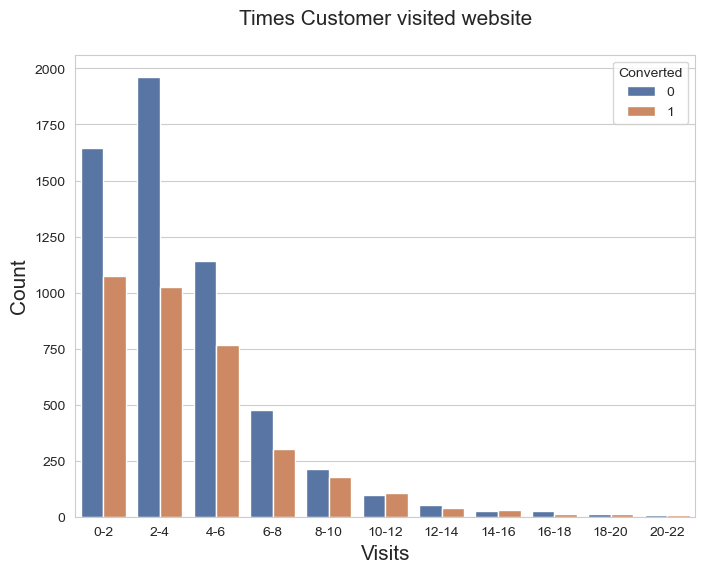

In [36]:
plt.figure(figsize=[8,6])
sns.set_style('whitegrid')

sns.countplot(data=new_df, x='TotalVisits', hue='Converted', palette= 'deep')

plt.title('Times Customer visited website\n', fontsize=15)
plt.xlabel('Visits', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

It shows that most of the conversion are among leads who visited website between 0 to 6 times. That signifies that people who purchase product already knew what they were looking for and might have visited website for targeted search of courses available on the website.

In [37]:
# Further applying bining for Total Time Spent on Website.

val_2 = [0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200]
bin_website = ['0-200','200-400','400-600','600-800','800-1000','1000-1200','1200-1400','1400-1600','1600-1800',
              '1800-2000','2000-2200']

new_df['Total Time Spent on Website'] = pd.cut(new_df['Total Time Spent on Website'], val_2, labels=bin_website, right=False)

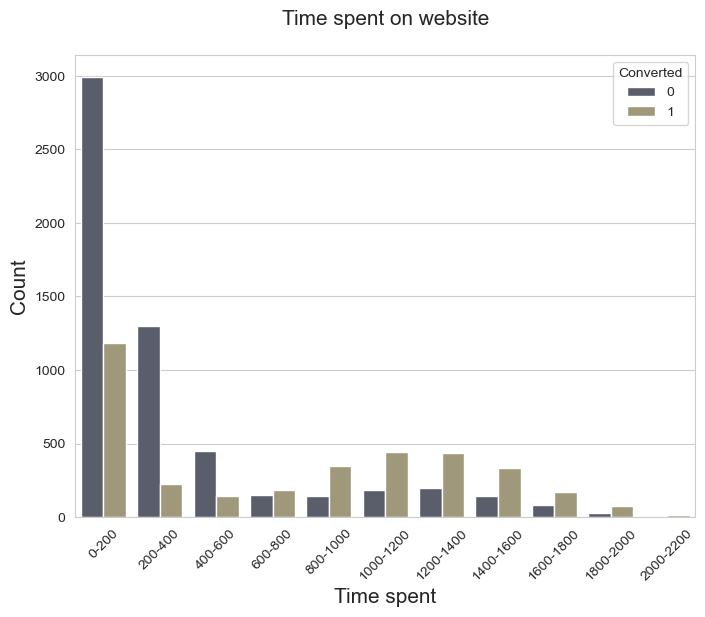

In [38]:
plt.figure(figsize=[8,6])
sns.set_style('whitegrid')

sns.countplot(data=new_df, x='Total Time Spent on Website', hue='Converted', palette= 'cividis')

plt.xticks(rotation=45)
plt.title('Time spent on website\n', fontsize=15)
plt.xlabel('Time spent', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

Clubbing insights from both of the above graph it is safe to assume that most of conversions have happened for leads who knew what they were looking for since their time spent on website is least comparing to othres. Therefore people with clearer mindset and specific product search are more favourable.

In [39]:
# Similarly applying same setting for 'Pages views per visits'
val_3 = [0,2,4,6,8,10,12]

bin_views = ['0-2','2-4','4-6','6-8','8-10','10-12']
new_df['Page Views Per Visit'] = pd.cut(new_df['Page Views Per Visit'], val_3, labels=bin_views, right=False)

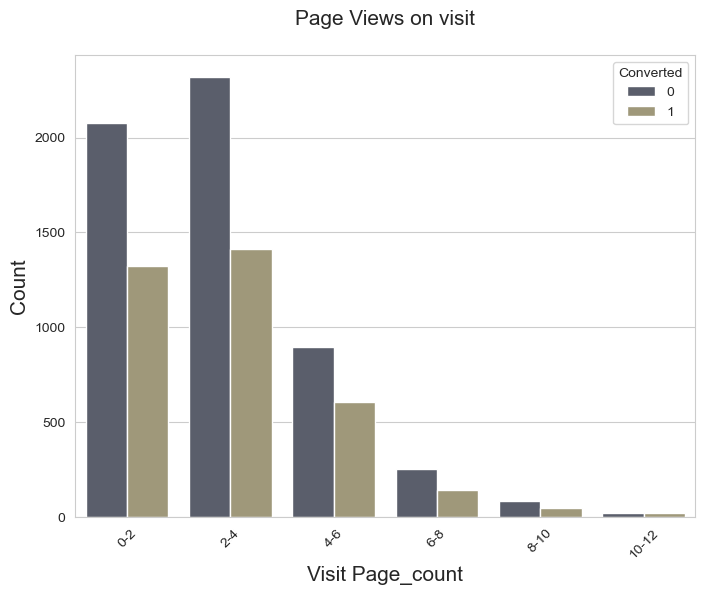

In [40]:
plt.figure(figsize=[8,6])
sns.set_style('whitegrid')

sns.countplot(data=new_df, x='Page Views Per Visit', hue='Converted', palette= 'cividis')

plt.xticks(rotation=45)
plt.title('Page Views on visit\n', fontsize=15)
plt.xlabel('Visit Page_count', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

This plot confirms the above assumption since most conversion has happened among people who scrolled between 0 to 4 pages

## Catagorical variable

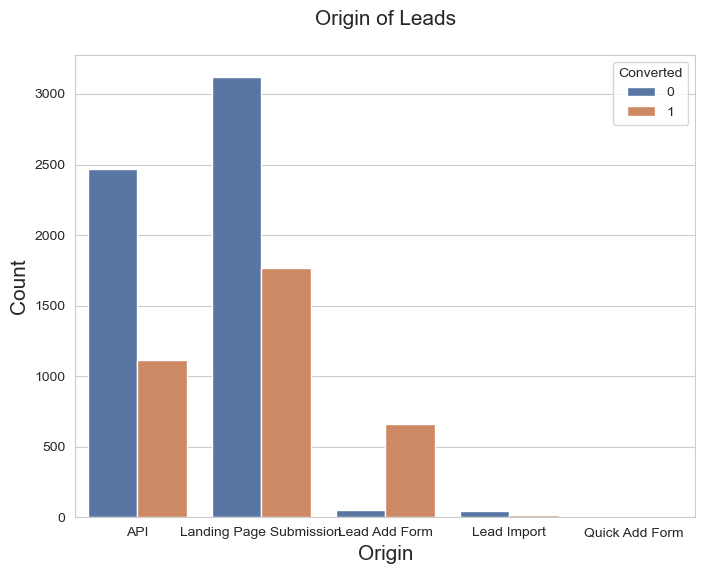

In [41]:
# Visualising the Leads origin plot for insgihts

plt.figure(figsize=[8,6])
sns.set_style('whitegrid')

sns.countplot(data=df, x='Lead Origin', hue='Converted', palette= 'deep')

plt.title('Origin of Leads\n', fontsize=15)
plt.xlabel('Origin', fontsize=15)
plt.ylabel('Count', fontsize=15)
#plt.yscale('log')
plt.show()

'Lead Add form' is a clear winner with highest conversion ratio whereas 'API' and 'Landing Page Submission' do have good conversion in totality!

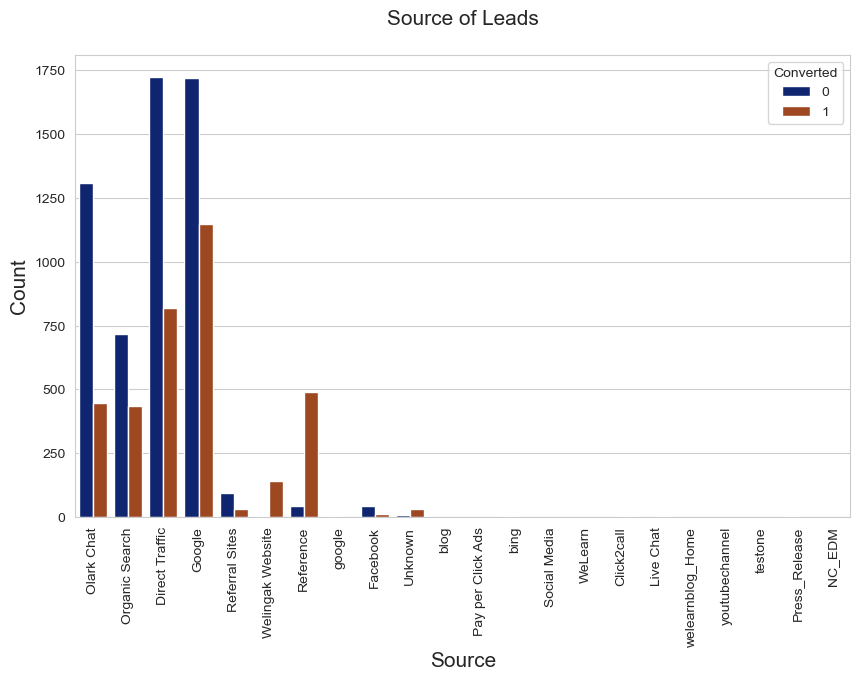

In [42]:
# Visualising the Leads source plot for insgihts

plt.figure(figsize=[10,6])
sns.set_style('whitegrid')

sns.countplot(data=df, x='Lead Source', hue='Converted', palette= 'dark')

plt.xticks(rotation=90)
plt.title('Source of Leads\n', fontsize=15)
plt.xlabel('Source', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

'Welingak website', 'Reference' have greater conversion and in abosolute value 'Google' & 'Direct Traffic' have better conversion. 'Organic Search' show better trade off than 'Olark Chat'.

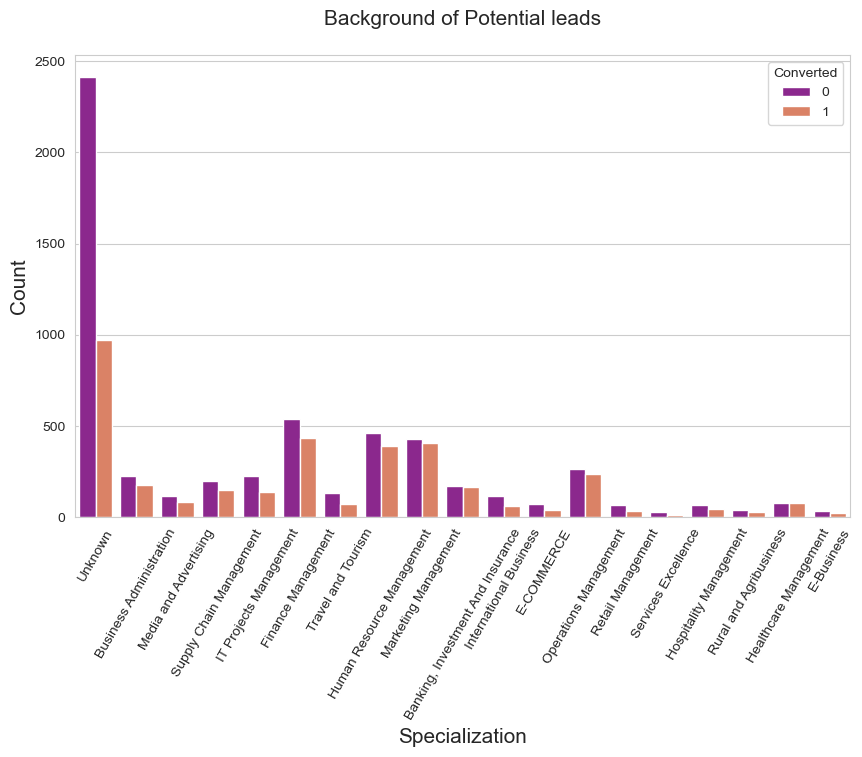

In [43]:
# Visualising the Specialization of leads for more targeted planning

plt.figure(figsize=[10,6])
sns.set_style('whitegrid')

sns.countplot(data=df, x='Specialization', hue='Converted', palette= 'plasma')

plt.xticks(rotation=60)
plt.title('Background of Potential leads\n', fontsize=15)
plt.xlabel('Specialization', fontsize=15)
plt.ylabel('Count', fontsize=15)
#plt.yscale('log')
plt.show()

No valuable insight since the column with maximum conversion is Unknown. Besides that we can focus on 'IT project management', 'HR management' and 'Travel and Tourism' as they have better turn around ratio.

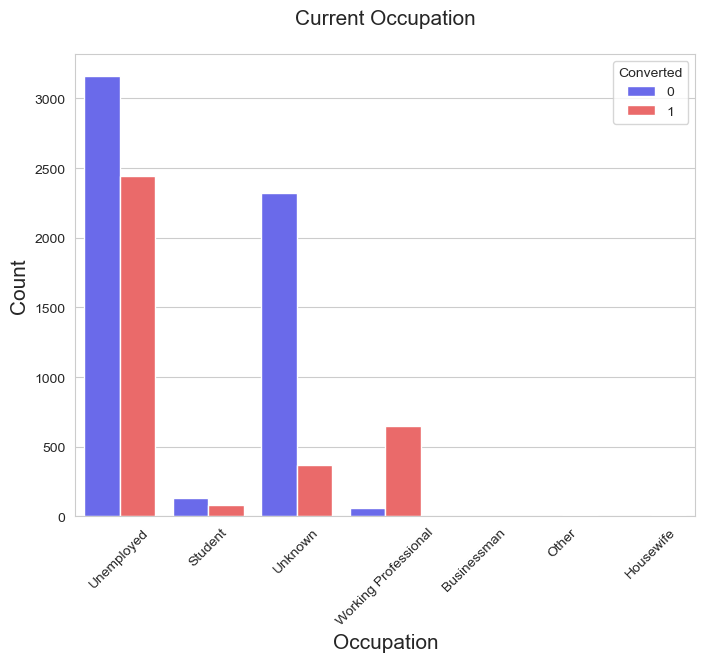

In [44]:
# Visualising the Leads present occupation plot for insgihts

plt.figure(figsize=[8,6])
sns.set_style('whitegrid')

sns.countplot(data=df, x='What is your current occupation', hue='Converted', palette= 'seismic')

plt.xticks(rotation=45)
plt.title('Current Occupation\n', fontsize=15)
plt.xlabel('Occupation', fontsize=15)
plt.ylabel('Count', fontsize=15)
#plt.yscale('log')
plt.show()

Unemployed and Working Professionals have better turn around. Special focus needs to be given to 'Working Professionals' as they have a very high conversion with fewer refusals.

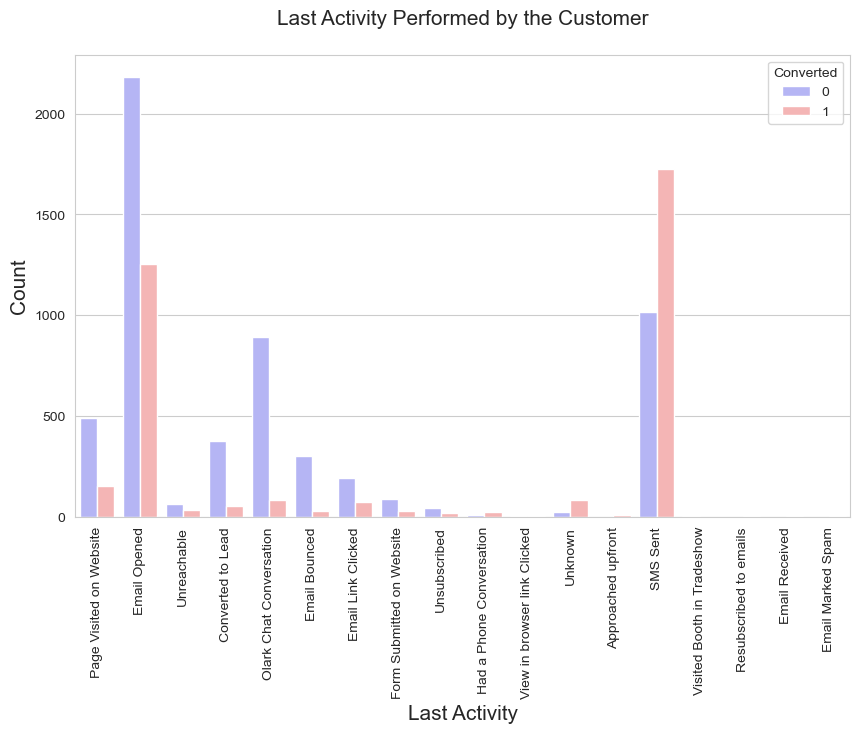

In [45]:
# Visualising the Last activity done by leads

plt.figure(figsize=[10,6])
sns.set_style('whitegrid')

sns.countplot(data=df, x='Last Activity', hue='Converted', palette= 'bwr')

plt.xticks(rotation=90)
plt.title('Last Activity Performed by the Customer\n', fontsize=15)
plt.xlabel('Last Activity', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

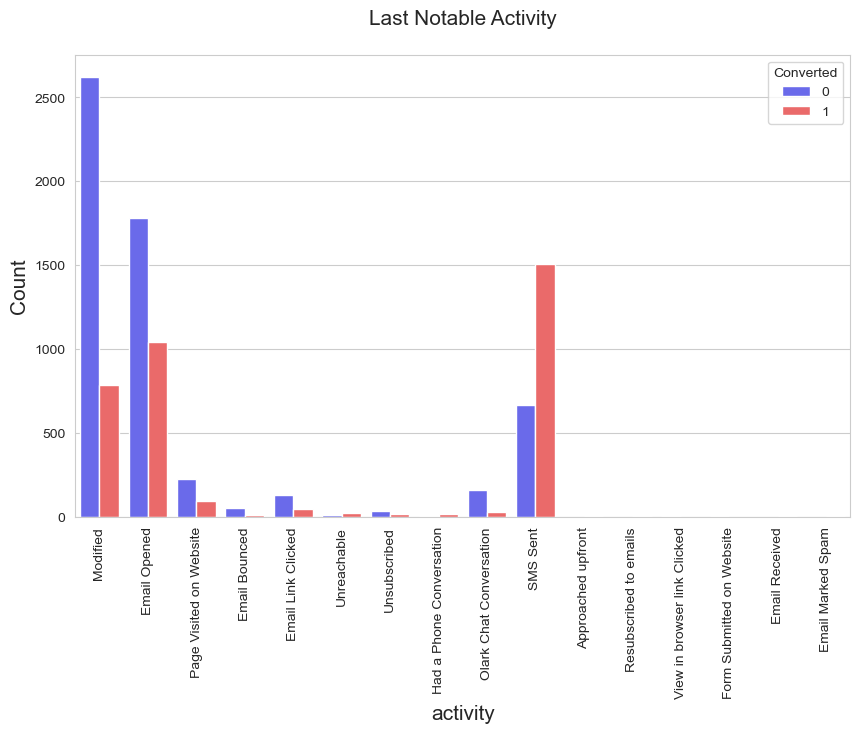

In [46]:
# Visualising the last notable activity

plt.figure(figsize=[10,6])
sns.set_style('whitegrid')

sns.countplot(data=df, x='Last Notable Activity', hue='Converted', palette= 'seismic')

plt.xticks(rotation=90)
plt.title('Last Notable Activity\n', fontsize=15)
plt.xlabel('activity', fontsize=15)
plt.ylabel('Count', fontsize=15)
#plt.yscale('log')
plt.show()

Based upon 'Last activity' and 'Last Notable Activity' we can say that people who 'opened mail' or whom 'sms sent' should be focused upon as they are more likley to get converted. More focus towards people who shared their contact details as they are much more inclined.

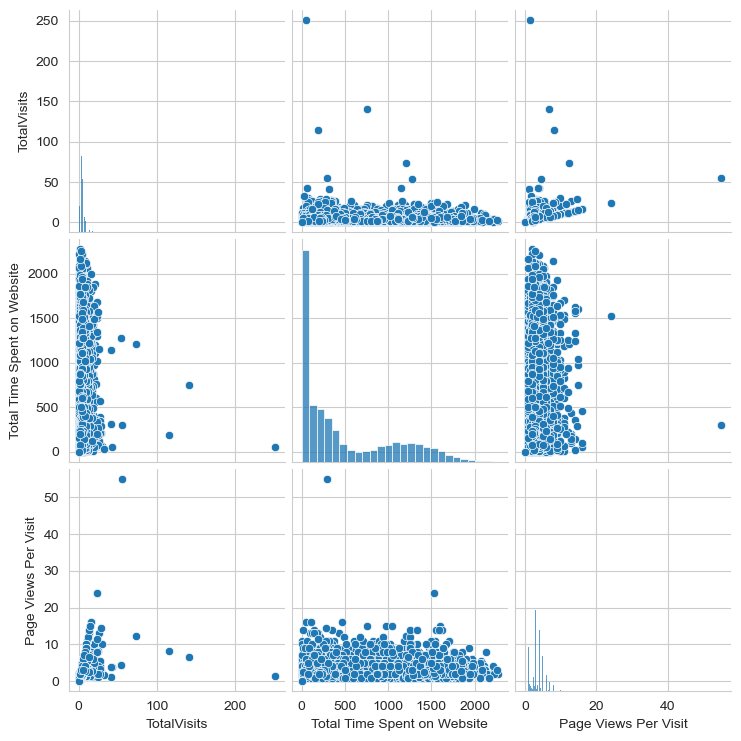

In [47]:
# Visualising the numerical columns for outliers and correlation

sns.pairplot(data=df,vars=['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit'])
plt.show()

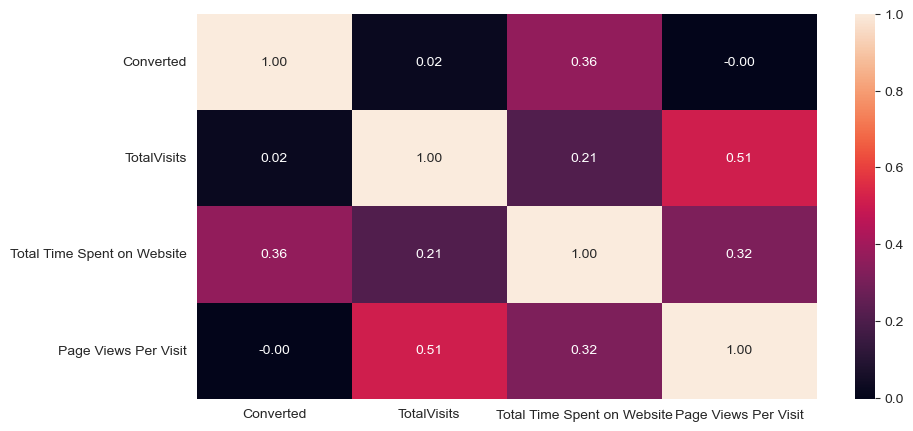

In [48]:
# Checking correlation among numerical variables.

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

1) There are no strong correlation present in data set we are good to start data preparation for modelling.                                                                                                    2) Very few outliers are present so will keep it as it is since it won't affect our analysis!!

# Step 5: Preparing data for Modelling

In [49]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Modified


In [50]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Last Notable Activity'],
      dtype='object')

In [51]:
# For catagorical variable with multiple level create dummy features (One-Hot Encoding)

dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Last Notable Activity']], drop_first=True)
df= pd.concat([df, dummy1], axis=1)

In [52]:
# Dropping repeated columns

df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'What is your current occupation',
       'Last Notable Activity'],1)

In [53]:
# Confirming the changes

df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Test-Train Split

In [54]:
# Putting feature variable to 'X'

X = df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [55]:
# Putting response variable to 'y'

y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [56]:
# Splitting the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [57]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])

X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1871,-0.645678,-0.885371,-1.088305
6795,0.109111,0.005716,-0.473232
3516,0.297808,-0.691418,0.067847
8105,0.297808,1.365219,1.223999
3934,-0.645678,-0.885371,-1.088305


In [58]:
# Checking the conversion rate

Leads_Conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
Leads_Conversion

38.53896103896104

Currently having 38.5% Conversion based upon the provided dataset

# Step 6: Correlations

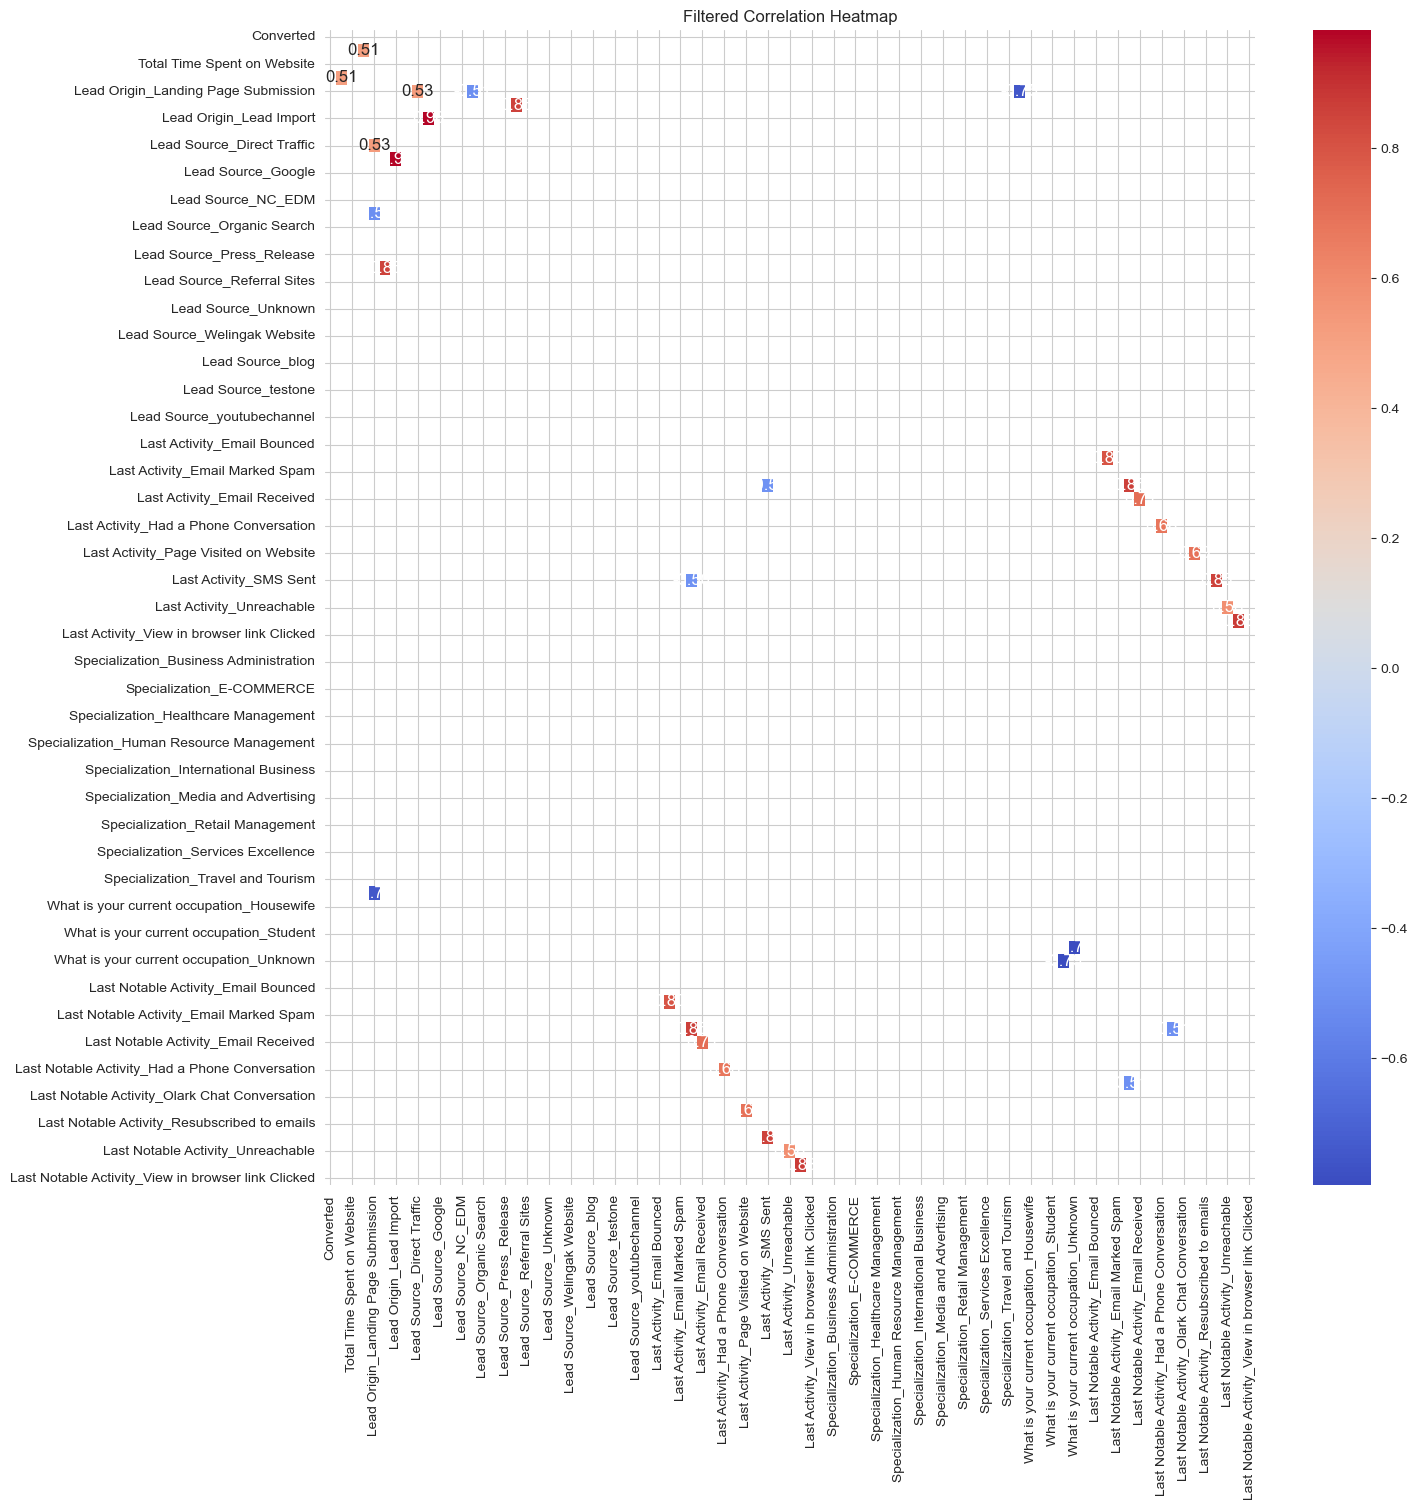

In [59]:
# Check the Correlation matrix
correlation_matrix = df.corr()

# Set correlation threshold
threshold = 0.5 

# Filter strong correlations
strong_correlations = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1)]

plt.figure(figsize=(15,15))
sns.heatmap(strong_correlations, annot=True, cmap='coolwarm', fmt=".2f",annot_kws={"size": 12})
plt.title('Filtered Correlation Heatmap')
plt.show()

There are few strong correlations present but it is difficult to read this chart and might end up choosing different value, so we will deal with highly correlated features later onn!

## RFE

In [60]:
# Runing with 15 

from sklearn.feature_selection import RFE
rfe = RFE(logreg,step = 15)             
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Origin_Quick Add Form', False, 4),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 2),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 2),
 ('Lead Source_Unknown', False, 2),
 ('Lead Source_WeLearn', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 4),
 ('Lead Source_blog', False, 3),
 ('Lead Source_google', False, 2),
 ('Lead Source_testone', Fals

In [62]:
col = X_train.columns[rfe.support_]

In [63]:
# Number of selected columns

len(X_train.columns[rfe.support_])

42

In [64]:
# Number of rejected columns

len(X_train.columns[~rfe.support_])

42

# Step 7: Assessing the model with StatsModels

In [65]:
# Adding a constant and creating a new dataset X_train_sm!!

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2551.3
Date:                Mon, 18 Mar 2024   Deviance:                       5102.6
Time:                        08:47:23   Pearson chi2:                 6.86e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4175
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5357      1.401      0.382      0.702      -2.210       3.281
Total Time Spent on Website                              1.0893      0.041     26.758      0.000       1.010       1.169
Lead Origin_Landing Page Submission                     -0.9337      0.138     -6.790      0.000      -1.203      -0.664
Lead Origin_Lead Add Form                                2.0295      0.769      2.639      0.008       0.522       3.537
Lead Source_Direct Traffic                              -0.9526      0.640     -1.488      0.137      -2.207       0.302
Lead Source_Facebook                                    -0.6422      0.821     -0.782      0.434      -2.252       0.967
Lead Source_Google                                      -0.5924      0.638     -0.928      0.353      -1.844       0.659
Lead Source_NC_EDM                                      22.9693   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   0.3750      0.645      0.582      0.561      -0.889       1.639
Lead Source_Organic Search                              -0.7862      0.643     -1.222      0.222      -2.047       0.475
Lead Source_Press_Release                              -21.2304   3.34e+04     -0.001      0.999   -6.54e+04    6.53e+04
Lead Source_Reference                                    0.3579      0.534      0.671      0.503      -0.688       1.404
Lead Source_Referral Sites                              -0.7824      0.710     -1.102      0.270      -2.173       0.609
Lead Source_Welingak Website                             2.6472      0.876      3.023      0.003       0.931       4.364
Last Activity_Converted to Lead                         -0.5503      0.318     -1.730      0.084      -1.174       0.073
Last Activity_Email Bounced                             -1.5198      0.383     -3.967      0.000      -2.271      -0.769
Last Activity_Email Opened                               0.5212      0.268      1.942      0.052      -0.005       1.047
Last Activity_Had a Phone Conversation                   0.9717      0.958      1.014      0.310      -0.906       2.849
Last Activity_Olark Chat Conversation                   -0.7307      0.300     -2.439      0.015      -1.318      -0.143
Last Activity_Page Visited on Website                   -0.4620      0.284     -1.624      0.104      -1.020       0.095
Last Activity_Resubscribed to emails                    12.1021   2.41e+04      0.001      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   0.9622      0.263      3.654      0.000       0.446       1.478
Last Activity_Unknown                                   -1

In [66]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.515707
6795    0.101542
3516    0.336645
8105    0.862928
3934    0.245429
4844    0.988798
3297    0.201657
8071    0.995638
987     0.060620
7423    0.923072
dtype: float64

In [67]:
# This operation essentially flattens the array into a one-dimensional array! 

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.51570725, 0.10154221, 0.33664515, 0.86292823, 0.24542856,
       0.98879803, 0.20165667, 0.99563761, 0.0606203 , 0.92307216])

### Creating a dataframe with the actual Conversion flag and their predicted probabilities!!

In [68]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Leads ID'] = y_train.index
y_train_pred_final.tail(10)

,Converted,Conversion_Prob,Leads ID
6458,0,0.316460,4376
6459,1,0.987439,802
6460,1,0.741889,5646
6461,0,0.203923,7906
6462,1,0.863136,4149
6463,1,0.754885,350
6464,1,0.959197,79
6465,1,0.291202,8039
6466,0,0.064828,6936
6467,0,0.105634,5640


### Creating new column 'predicted' with '1' if Conversion_Prob > '0.5' else '0'

In [69]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Leads ID,predicted
0,0,0.515707,1871,1
1,0,0.101542,6795,0
2,0,0.336645,3516,0
3,0,0.862928,8105,1
4,0,0.245429,3934,0


In [70]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3574  428]
 [ 699 1767]]


In [71]:
# Predicted     ->  Not_Converted  Converted 

# Actual
# not_converted ->       3574        428
# converted     ->       699        1767  

In [72]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8257575757575758


### Checking Variance Inflation Factor

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i)   for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last Activity_Resubscribed to emails,inf
39,Last Notable Activity_Resubscribed to emails,inf
31,What is your current occupation_Unemployed,180.37
32,What is your current occupation_Unknown,88.36
5,Lead Source_Google,81.28
3,Lead Source_Direct Traffic,70.39
7,Lead Source_Olark Chat,50.01
2,Lead Origin_Lead Add Form,32.73
8,Lead Source_Organic Search,31.70
33,What is your current occupation_Working Profes...,23.80


It seems that i have encountered a value 'inf'(infinity) which typically means perfect multicolinearity along with certain columns which have High VIF. Lets drop these columns and check it again.

## Dropping and Iterating

In [74]:
col = col.drop('Last Notable Activity_Resubscribed to emails',1)

In [75]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2551.3
Date:                Mon, 18 Mar 2024   Deviance:                       5102.6
Time:                        08:47:24   Pearson chi2:                 6.86e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4175
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5357      1.401      0.382      0.702      -2.210       3.281
Total Time Spent on Website                              1.0893      0.041     26.758      0.000       1.010       1.169
Lead Origin_Landing Page Submission                     -0.9337      0.138     -6.790      0.000      -1.203      -0.664
Lead Origin_Lead Add Form                                2.0295      0.769      2.639      0.008       0.522       3.537
Lead Source_Direct Traffic                              -0.9526      0.640     -1.488      0.137      -2.207       0.302
Lead Source_Facebook                                    -0.6422      0.821     -0.782      0.434      -2.252       0.967
Lead Source_Google                                      -0.5924      0.638     -0.928      0.353      -1.844       0.659
Lead Source_NC_EDM                                      22.9693   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   0.3750      0.645      0.582      0.561      -0.889       1.639
Lead Source_Organic Search                              -0.7862      0.643     -1.222      0.222      -2.047       0.475
Lead Source_Press_Release                              -21.2304   3.34e+04     -0.001      0.999   -6.54e+04    6.53e+04
Lead Source_Reference                                    0.3579      0.534      0.671      0.503      -0.688       1.404
Lead Source_Referral Sites                              -0.7824      0.710     -1.102      0.270      -2.173       0.609
Lead Source_Welingak Website                             2.6472      0.876      3.023      0.003       0.931       4.364
Last Activity_Converted to Lead                         -0.5503      0.318     -1.730      0.084      -1.174       0.073
Last Activity_Email Bounced                             -1.5198      0.383     -3.967      0.000      -2.271      -0.769
Last Activity_Email Opened                               0.5212      0.268      1.942      0.052      -0.005       1.047
Last Activity_Had a Phone Conversation                   0.9717      0.958      1.014      0.310      -0.906       2.849
Last Activity_Olark Chat Conversation                   -0.7307      0.300     -2.439      0.015      -1.318      -0.143
Last Activity_Page Visited on Website                   -0.4620      0.284     -1.624      0.104      -1.020       0.095
Last Activity_Resubscribed to emails                    24.2043   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   0.9622      0.263      3.654      0.000       0.446       1.478
Last Activity_Unknown                                   -1

In [76]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [77]:
y_train_pred[:10]

array([0.51570725, 0.10154221, 0.33664515, 0.86292823, 0.24542856,
       0.98879803, 0.20165667, 0.99563761, 0.0606203 , 0.92307216])

In [78]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [79]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Leads ID,predicted
0,0,0.515707,1871,1
1,0,0.101542,6795,0
2,0,0.336645,3516,0
3,0,0.862928,8105,1
4,0,0.245429,3934,0


In [80]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8257575757575758


Overall accuracy haven't dropped much

### Checking Variance Inflation Factor again

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i)    for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
31,What is your current occupation_Unemployed,180.37
32,What is your current occupation_Unknown,88.36
5,Lead Source_Google,81.28
3,Lead Source_Direct Traffic,70.39
7,Lead Source_Olark Chat,50.01
2,Lead Origin_Lead Add Form,32.73
8,Lead Source_Organic Search,31.70
33,What is your current occupation_Working Profes...,23.80
15,Last Activity_Email Opened,19.70
20,Last Activity_SMS Sent,14.74


Still high VIF values present. Need to drop few more columns!

## Dropping and Iterating

In [82]:
col = col.drop('What is your current occupation_Unemployed', 1)

In [83]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2551.4
Date:                Mon, 18 Mar 2024   Deviance:                       5102.7
Time:                        08:47:25   Pearson chi2:                 6.86e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4175
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9132      0.702      1.300      0.193      -0.463       2.289
Total Time Spent on Website                              1.0893      0.041     26.755      0.000       1.009       1.169
Lead Origin_Landing Page Submission                     -0.9317      0.137     -6.785      0.000      -1.201      -0.663
Lead Origin_Lead Add Form                                2.0297      0.769      2.640      0.008       0.523       3.537
Lead Source_Direct Traffic                              -0.9527      0.640     -1.489      0.137      -2.207       0.302
Lead Source_Facebook                                    -0.6421      0.821     -0.782      0.434      -2.251       0.967
Lead Source_Google                                      -0.5924      0.638     -0.928      0.353      -1.843       0.658
Lead Source_NC_EDM                                      22.9689   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   0.3754      0.645      0.582      0.560      -0.888       1.639
Lead Source_Organic Search                              -0.7866      0.643     -1.223      0.222      -2.048       0.474
Lead Source_Press_Release                              -21.2298   3.34e+04     -0.001      0.999   -6.54e+04    6.53e+04
Lead Source_Reference                                    0.3565      0.534      0.668      0.504      -0.689       1.403
Lead Source_Referral Sites                              -0.7816      0.710     -1.101      0.271      -2.172       0.609
Lead Source_Welingak Website                             2.6469      0.876      3.023      0.003       0.931       4.363
Last Activity_Converted to Lead                         -0.5493      0.318     -1.728      0.084      -1.172       0.074
Last Activity_Email Bounced                             -1.5185      0.383     -3.965      0.000      -2.269      -0.768
Last Activity_Email Opened                               0.5214      0.268      1.943      0.052      -0.004       1.047
Last Activity_Had a Phone Conversation                   0.9728      0.958      1.016      0.310      -0.904       2.850
Last Activity_Olark Chat Conversation                   -0.7313      0.299     -2.442      0.015      -1.318      -0.144
Last Activity_Page Visited on Website                   -0.4620      0.284     -1.625      0.104      -1.019       0.095
Last Activity_Resubscribed to emails                    24.2053   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   0.9636      0.263      3.662      0.000       0.448       1.479
Last Activity_Unknown                                   -1

In [84]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [85]:
y_train_pred[:10]

array([0.51530066, 0.10169905, 0.3366789 , 0.86293084, 0.24532332,
       0.98880258, 0.20169221, 0.99562775, 0.06067605, 0.92305503])

In [86]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [87]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Leads ID,predicted
0,0,0.515301,1871,1
1,0,0.101699,6795,0
2,0,0.336679,3516,0
3,0,0.862931,8105,1
4,0,0.245323,3934,0


In [88]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8257575757575758


Accuracy is still intact

## Check the VIF

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,18.91
15,Last Activity_Email Opened,18.66
5,Lead Source_Google,16.76
3,Lead Source_Direct Traffic,16.02
20,Last Activity_SMS Sent,13.24
10,Lead Source_Reference,13.12
7,Lead Source_Olark Chat,10.51
34,Last Notable Activity_Email Opened,9.90
1,Lead Origin_Landing Page Submission,7.99
8,Lead Source_Organic Search,7.24


Dropping another column since model still have high VIF values, it needs to come below 5

## Dropping and Iterating

In [90]:
col = col.drop('Last Activity_Email Opened',1)

In [91]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2553.3
Date:                Mon, 18 Mar 2024   Deviance:                       5106.6
Time:                        08:47:27   Pearson chi2:                 6.85e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4172
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2968      0.672      1.929      0.054      -0.021       2.615
Total Time Spent on Website                              1.0897      0.041     26.781      0.000       1.010       1.169
Lead Origin_Landing Page Submission                     -0.9301      0.137     -6.788      0.000      -1.199      -0.662
Lead Origin_Lead Add Form                                2.0309      0.768      2.643      0.008       0.525       3.537
Lead Source_Direct Traffic                              -0.9491      0.640     -1.484      0.138      -2.203       0.304
Lead Source_Facebook                                    -0.6392      0.821     -0.779      0.436      -2.248       0.970
Lead Source_Google                                      -0.5948      0.638     -0.933      0.351      -1.845       0.655
Lead Source_NC_EDM                                      22.9715   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   0.3726      0.644      0.578      0.563      -0.890       1.636
Lead Source_Organic Search                              -0.7894      0.643     -1.228      0.220      -2.050       0.471
Lead Source_Press_Release                              -21.2291   3.34e+04     -0.001      0.999   -6.54e+04    6.53e+04
Lead Source_Reference                                    0.3589      0.533      0.673      0.501      -0.687       1.404
Lead Source_Referral Sites                              -0.7890      0.709     -1.113      0.266      -2.178       0.600
Lead Source_Welingak Website                             2.6356      0.875      3.011      0.003       0.920       4.351
Last Activity_Converted to Lead                         -0.9390      0.243     -3.861      0.000      -1.416      -0.462
Last Activity_Email Bounced                             -1.9089      0.324     -5.895      0.000      -2.544      -1.274
Last Activity_Had a Phone Conversation                   0.5838      0.936      0.624      0.533      -1.250       2.418
Last Activity_Olark Chat Conversation                   -1.1231      0.218     -5.162      0.000      -1.549      -0.697
Last Activity_Page Visited on Website                   -0.8497      0.198     -4.281      0.000      -1.239      -0.461
Last Activity_Resubscribed to emails                    23.8138   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   0.5755      0.166      3.461      0.001       0.250       0.901
Last Activity_Unknown                                   -1.3997      0.459     -3.050      0.002      -2.299      -0.500
Last Activity_Unreachable                               -1

In [92]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.51354492, 0.10287478, 0.33769691, 0.86235239, 0.22251284,
       0.98879564, 0.20202828, 0.99561942, 0.06065892, 0.92342988])

In [93]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [94]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Leads ID,predicted
0,0,0.513545,1871,1
1,0,0.102875,6795,0
2,0,0.337697,3516,0
3,0,0.862352,8105,1
4,0,0.222513,3934,0


In [95]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8263760049474336


A slight fall in accuracy but practically the same

## Check VIF

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,17.55
10,Lead Source_Reference,13.11
5,Lead Source_Google,10.56
3,Lead Source_Direct Traffic,10.51
33,Last Notable Activity_Email Opened,8.07
1,Lead Origin_Landing Page Submission,7.98
7,Lead Source_Olark Chat,6.67
19,Last Activity_SMS Sent,6.54
35,Last Notable Activity_Modified,4.96
8,Lead Source_Organic Search,4.83


## Dropping another column

In [97]:
col = col.drop('Lead Origin_Lead Add Form',1)

In [98]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.4
Date:                Mon, 18 Mar 2024   Deviance:                       5114.8
Time:                        08:47:29   Pearson chi2:                 6.86e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4164
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.6005      0.420      6.195      0.000       1.778       3.423
Total Time Spent on Website                              1.0862      0.041     26.731      0.000       1.007       1.166
Lead Origin_Landing Page Submission                     -0.9670      0.136     -7.101      0.000      -1.234      -0.700
Lead Source_Direct Traffic                              -2.2150      0.376     -5.886      0.000      -2.953      -1.478
Lead Source_Facebook                                    -1.9521      0.628     -3.111      0.002      -3.182      -0.722
Lead Source_Google                                      -1.8678      0.371     -5.040      0.000      -2.594      -1.141
Lead Source_NC_EDM                                      21.7226   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                  -0.9165      0.374     -2.452      0.014      -1.649      -0.184
Lead Source_Organic Search                              -2.0648      0.378     -5.456      0.000      -2.807      -1.323
Lead Source_Press_Release                              -22.4847   3.34e+04     -0.001      0.999   -6.54e+04    6.54e+04
Lead Source_Reference                                    1.0752      0.417      2.578      0.010       0.258       1.893
Lead Source_Referral Sites                              -2.0725      0.479     -4.323      0.000      -3.012      -1.133
Lead Source_Welingak Website                             3.3530      0.810      4.141      0.000       1.766       4.940
Last Activity_Converted to Lead                         -0.9457      0.243     -3.892      0.000      -1.422      -0.469
Last Activity_Email Bounced                             -1.8693      0.322     -5.810      0.000      -2.500      -1.239
Last Activity_Had a Phone Conversation                   0.5857      0.935      0.627      0.531      -1.247       2.418
Last Activity_Olark Chat Conversation                   -1.1399      0.218     -5.225      0.000      -1.567      -0.712
Last Activity_Page Visited on Website                   -0.8528      0.198     -4.314      0.000      -1.240      -0.465
Last Activity_Resubscribed to emails                    23.8195   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   0.5812      0.166      3.501      0.000       0.256       0.907
Last Activity_Unknown                                   -1.3290      0.464     -2.865      0.004      -2.238      -0.420
Last Activity_Unreachable                               -1.2794      0.670     -1.909      0.056      -2.593       0.034
Specialization_Hospitality Management                   -1

In [99]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.51739412, 0.10177196, 0.33863107, 0.86175079, 0.22404437,
       0.98877123, 0.20109489, 0.99558004, 0.06007585, 0.92477299])

In [100]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [101]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Leads ID,predicted
0,0,0.517394,1871,1
1,0,0.101772,6795,0
2,0,0.338631,3516,0
3,0,0.861751,8105,1
4,0,0.224044,3934,0


In [102]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.825139146567718


## Check VIF

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i)    for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Direct Traffic,9.81
4,Lead Source_Google,9.77
1,Lead Origin_Landing Page Submission,7.94
32,Last Notable Activity_Email Opened,7.51
6,Lead Source_Olark Chat,6.17
18,Last Activity_SMS Sent,6.03
34,Last Notable Activity_Modified,4.76
25,Specialization_Unknown,4.66
7,Lead Source_Organic Search,4.51
15,Last Activity_Olark Chat Conversation,2.55


## Dropping another column

In [104]:
col = col.drop('Lead Source_Direct Traffic',1)

In [105]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.4
Date:                Mon, 18 Mar 2024   Deviance:                       5150.7
Time:                        08:47:31   Pearson chi2:                 6.80e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4132
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5611      0.223      2.514      0.012       0.124       0.999
Total Time Spent on Website                              1.0654      0.040     26.483      0.000       0.987       1.144
Lead Origin_Landing Page Submission                     -1.0850      0.135     -8.064      0.000      -1.349      -0.821
Lead Source_Facebook                                     0.0395      0.531      0.074      0.941      -1.001       1.080
Lead Source_Google                                       0.2379      0.094      2.533      0.011       0.054       0.422
Lead Source_NC_EDM                                      23.8970   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.0947      0.147      7.451      0.000       0.807       1.383
Lead Source_Organic Search                               0.0397      0.121      0.327      0.743      -0.198       0.278
Lead Source_Press_Release                              -20.3290   3.34e+04     -0.001      1.000   -6.55e+04    6.55e+04
Lead Source_Reference                                    3.0621      0.243     12.595      0.000       2.586       3.539
Lead Source_Referral Sites                              -0.0115      0.325     -0.036      0.972      -0.648       0.625
Lead Source_Welingak Website                             5.3338      0.736      7.244      0.000       3.891       6.777
Last Activity_Converted to Lead                         -0.9649      0.242     -3.984      0.000      -1.440      -0.490
Last Activity_Email Bounced                             -1.7668      0.315     -5.607      0.000      -2.384      -1.149
Last Activity_Had a Phone Conversation                   0.5872      0.928      0.633      0.527      -1.232       2.406
Last Activity_Olark Chat Conversation                   -1.1368      0.217     -5.243      0.000      -1.562      -0.712
Last Activity_Page Visited on Website                   -0.8397      0.197     -4.263      0.000      -1.226      -0.454
Last Activity_Resubscribed to emails                    23.8427   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   0.6079      0.165      3.677      0.000       0.284       0.932
Last Activity_Unknown                                   -1.1881      0.482     -2.465      0.014      -2.133      -0.243
Last Activity_Unreachable                               -1.1836      0.671     -1.764      0.078      -2.498       0.131
Specialization_Hospitality Management                   -1.0034      0.337     -2.981      0.003      -1.663      -0.344
Specialization_International Business                   -0

In [106]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.51758824, 0.10787796, 0.33723144, 0.85526071, 0.22374868,
       0.98904577, 0.1958303 , 0.99533184, 0.05936291, 0.92810206])

In [107]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [108]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Leads ID,predicted
0,0,0.517588,1871,1
1,0,0.107878,6795,0
2,0,0.337231,3516,0
3,0,0.855261,8105,1
4,0,0.223749,3934,0


In [109]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8225108225108225


Slight drop but not very significant

## VIF confirmation

In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,5.38
31,Last Notable Activity_Email Opened,4.22
24,Specialization_Unknown,4.00
17,Last Activity_SMS Sent,3.71
33,Last Notable Activity_Modified,3.59
5,Lead Source_Olark Chat,2.94
14,Last Activity_Olark Chat Conversation,2.36
3,Lead Source_Google,2.17
13,Last Activity_Had a Phone Conversation,2.04
32,Last Notable Activity_Had a Phone Conversation,2.02


With few more iterations we can sum up the result

## Further Iterating

In [111]:
col = col.drop('Lead Origin_Landing Page Submission',1)

In [112]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.6
Date:                Mon, 18 Mar 2024   Deviance:                       5217.3
Time:                        08:47:32   Pearson chi2:                 6.66e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4979      0.180     -2.766      0.006      -0.851      -0.145
Total Time Spent on Website                              1.0729      0.040     26.801      0.000       0.994       1.151
Lead Source_Facebook                                     0.5749      0.530      1.085      0.278      -0.463       1.613
Lead Source_Google                                       0.4341      0.091      4.791      0.000       0.257       0.612
Lead Source_NC_EDM                                      23.8988   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.6064      0.134     12.024      0.000       1.345       1.868
Lead Source_Organic Search                               0.2209      0.119      1.861      0.063      -0.012       0.454
Lead Source_Press_Release                              -20.3595   3.35e+04     -0.001      1.000   -6.56e+04    6.55e+04
Lead Source_Reference                                    3.8493      0.225     17.131      0.000       3.409       4.290
Lead Source_Referral Sites                               0.3596      0.323      1.112      0.266      -0.274       0.993
Lead Source_Welingak Website                             5.7554      0.734      7.845      0.000       4.317       7.193
Last Activity_Converted to Lead                         -0.9746      0.242     -4.023      0.000      -1.449      -0.500
Last Activity_Email Bounced                             -1.7930      0.312     -5.747      0.000      -2.404      -1.182
Last Activity_Had a Phone Conversation                   0.5509      0.929      0.593      0.553      -1.270       2.371
Last Activity_Olark Chat Conversation                   -1.0865      0.213     -5.103      0.000      -1.504      -0.669
Last Activity_Page Visited on Website                   -0.8345      0.195     -4.274      0.000      -1.217      -0.452
Last Activity_Resubscribed to emails                    23.7559   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   0.5744      0.164      3.510      0.000       0.254       0.895
Last Activity_Unknown                                   -1.2008      0.487     -2.466      0.014      -2.155      -0.246
Last Activity_Unreachable                               -1.2939      0.666     -1.944      0.052      -2.599       0.011
Specialization_Hospitality Management                   -0.9657      0.330     -2.928      0.003      -1.612      -0.319
Specialization_International Business                   -0.4017      0.256     -1.571      0.116      -0.903       0.099
Specialization_Retail Management                        -0

In [113]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.38274445, 0.19772306, 0.36769304, 0.87818694, 0.24979247,
       0.98964315, 0.22560306, 0.99406043, 0.05747114, 0.91347379])

In [114]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [115]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Leads ID,predicted
0,0,0.382744,1871,0
1,0,0.197723,6795,0
2,0,0.367693,3516,0
3,0,0.878187,8105,1
4,0,0.249792,3934,0


In [116]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8175633889919605


## Check the VIF again

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i)    for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
32,Last Notable Activity_Modified,2.75
4,Lead Source_Olark Chat,2.74
23,Specialization_Unknown,2.67
13,Last Activity_Olark Chat Conversation,2.26
2,Lead Source_Google,2.16
12,Last Activity_Had a Phone Conversation,2.04
31,Last Notable Activity_Had a Phone Conversation,2.02
30,Last Notable Activity_Email Opened,1.90
16,Last Activity_SMS Sent,1.79
27,What is your current occupation_Unknown,1.69


Finally VIF looks good for the final model. Now further iteration is required for p-value as there are variables with high p-value.

## Dropping few other values which have high p-value and doesn't have much significance based upon EDA

In [118]:
col = col.drop(['Lead Source_NC_EDM',  'Lead Source_Press_Release',   'Last Activity_Resubscribed to emails'], 1)

In [119]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.9
Date:                Mon, 18 Mar 2024   Deviance:                       5223.7
Time:                        08:47:33   Pearson chi2:                 6.67e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4065
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4736      0.180     -2.638      0.008      -0.825      -0.122
Total Time Spent on Website                              1.0731      0.040     26.809      0.000       0.995       1.152
Lead Source_Facebook                                     0.5747      0.530      1.085      0.278      -0.464       1.613
Lead Source_Google                                       0.4314      0.091      4.764      0.000       0.254       0.609
Lead Source_Olark Chat                                   1.6077      0.134     12.041      0.000       1.346       1.869
Lead Source_Organic Search                               0.2187      0.119      1.843      0.065      -0.014       0.451
Lead Source_Reference                                    3.8493      0.225     17.131      0.000       3.409       4.290
Lead Source_Referral Sites                               0.3557      0.323      1.101      0.271      -0.278       0.989
Lead Source_Welingak Website                             5.7558      0.734      7.846      0.000       4.318       7.194
Last Activity_Converted to Lead                         -0.9830      0.242     -4.061      0.000      -1.458      -0.509
Last Activity_Email Bounced                             -1.8079      0.312     -5.797      0.000      -2.419      -1.197
Last Activity_Had a Phone Conversation                   0.5423      0.928      0.584      0.559      -1.277       2.362
Last Activity_Olark Chat Conversation                   -1.0980      0.213     -5.164      0.000      -1.515      -0.681
Last Activity_Page Visited on Website                   -0.8572      0.195     -4.400      0.000      -1.239      -0.475
Last Activity_SMS Sent                                   0.5524      0.163      3.386      0.001       0.233       0.872
Last Activity_Unknown                                   -1.2094      0.487     -2.483      0.013      -2.164      -0.255
Last Activity_Unreachable                               -1.3009      0.666     -1.954      0.051      -2.606       0.004
Specialization_Hospitality Management                   -0.9673      0.330     -2.933      0.003      -1.614      -0.321
Specialization_International Business                   -0.4029      0.256     -1.576      0.115      -0.904       0.098
Specialization_Retail Management                        -0.5382      0.325     -1.656      0.098      -1.175       0.099
Specialization_Rural and Agribusiness                    0.4624      0.387      1.194      0.232      -0.296       1.221
Specialization_Unknown                                  -0.2726      0.092     -2.978      0.003      -0.452      -0.093
What is your current occupation_Housewife               22

Still have significant numbers of high p-values, our tagrgeted significance level is below 0.05

In [120]:
## Dropping few more columns

col = col.drop(['What is your current occupation_Housewife',  'What is your current occupation_Other', 
                'Last Activity_Had a Phone Conversation'],1)

In [121]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.9
Date:                Mon, 18 Mar 2024   Deviance:                       5235.7
Time:                        08:47:33   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4054
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4470      0.179     -2.503      0.012      -0.797      -0.097
Total Time Spent on Website                              1.0723      0.040     26.828      0.000       0.994       1.151
Lead Source_Facebook                                     0.5716      0.529      1.079      0.280      -0.466       1.609
Lead Source_Google                                       0.4344      0.090      4.807      0.000       0.257       0.612
Lead Source_Olark Chat                                   1.6077      0.133     12.050      0.000       1.346       1.869
Lead Source_Organic Search                               0.2278      0.118      1.923      0.055      -0.004       0.460
Lead Source_Reference                                    3.8720      0.224     17.262      0.000       3.432       4.312
Lead Source_Referral Sites                               0.3633      0.322      1.130      0.259      -0.267       0.994
Lead Source_Welingak Website                             5.7532      0.733      7.844      0.000       4.316       7.191
Last Activity_Converted to Lead                         -1.0079      0.241     -4.177      0.000      -1.481      -0.535
Last Activity_Email Bounced                             -1.8327      0.311     -5.885      0.000      -2.443      -1.222
Last Activity_Olark Chat Conversation                   -1.1183      0.212     -5.279      0.000      -1.534      -0.703
Last Activity_Page Visited on Website                   -0.8829      0.194     -4.559      0.000      -1.263      -0.503
Last Activity_SMS Sent                                   0.5267      0.162      3.250      0.001       0.209       0.844
Last Activity_Unknown                                   -1.2125      0.484     -2.505      0.012      -2.161      -0.264
Last Activity_Unreachable                               -1.3301      0.666     -1.998      0.046      -2.635      -0.025
Specialization_Hospitality Management                   -0.9776      0.330     -2.962      0.003      -1.624      -0.331
Specialization_International Business                   -0.4095      0.256     -1.602      0.109      -0.911       0.091
Specialization_Retail Management                        -0.5443      0.325     -1.676      0.094      -1.181       0.092
Specialization_Rural and Agribusiness                    0.4531      0.387      1.171      0.242      -0.305       1.212
Specialization_Unknown                                  -0.2802      0.091     -3.064      0.002      -0.459      -0.101
What is your current occupation_Student                  0.1026      0.232      0.442      0.658      -0.352       0.557
What is your current occupation_Unknown                 -1

In [122]:
# Dropping few more columns

col = col.drop(['What is your current occupation_Student',
                'Specialization_Rural and Agribusiness', 'Specialization_International Business'],1)

In [123]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.0
Date:                Mon, 18 Mar 2024   Deviance:                       5240.0
Time:                        08:47:33   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4050
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4494      0.178     -2.520      0.012      -0.799      -0.100
Total Time Spent on Website                              1.0727      0.040     26.847      0.000       0.994       1.151
Lead Source_Facebook                                     0.5772      0.528      1.092      0.275      -0.459       1.613
Lead Source_Google                                       0.4303      0.090      4.767      0.000       0.253       0.607
Lead Source_Olark Chat                                   1.6121      0.133     12.088      0.000       1.351       1.874
Lead Source_Organic Search                               0.2354      0.118      1.992      0.046       0.004       0.467
Lead Source_Reference                                    3.8754      0.224     17.307      0.000       3.436       4.314
Lead Source_Referral Sites                               0.3730      0.322      1.158      0.247      -0.258       1.005
Lead Source_Welingak Website                             5.7516      0.733      7.843      0.000       4.314       7.189
Last Activity_Converted to Lead                         -1.0121      0.241     -4.194      0.000      -1.485      -0.539
Last Activity_Email Bounced                             -1.8446      0.313     -5.898      0.000      -2.458      -1.232
Last Activity_Olark Chat Conversation                   -1.1217      0.212     -5.298      0.000      -1.537      -0.707
Last Activity_Page Visited on Website                   -0.8765      0.193     -4.531      0.000      -1.256      -0.497
Last Activity_SMS Sent                                   0.5218      0.162      3.218      0.001       0.204       0.840
Last Activity_Unknown                                   -1.2126      0.484     -2.507      0.012      -2.161      -0.265
Last Activity_Unreachable                               -1.3750      0.663     -2.073      0.038      -2.675      -0.075
Specialization_Hospitality Management                   -0.9698      0.330     -2.939      0.003      -1.616      -0.323
Specialization_Retail Management                        -0.5335      0.325     -1.644      0.100      -1.170       0.103
Specialization_Unknown                                  -0.2737      0.091     -3.012      0.003      -0.452      -0.096
What is your current occupation_Unknown                 -1.0759      0.088    -12.251      0.000      -1.248      -0.904
What is your current occupation_Working Professional     2.4766      0.189     13.073      0.000       2.105       2.848
Last Notable Activity_Email Link Clicked                -1.1738      0.317     -3.698      0.000      -1.796      -0.552
Last Notable Activity_Email Opened                      -0

In [124]:
# Dropping again

col = col.drop(['Lead Source_Facebook', 'Lead Source_Referral Sites'],1)

In [125]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.2
Date:                Mon, 18 Mar 2024   Deviance:                       5242.3
Time:                        08:47:33   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4048
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4285      0.177     -2.415      0.016      -0.776      -0.081
Total Time Spent on Website                              1.0709      0.040     26.843      0.000       0.993       1.149
Lead Source_Google                                       0.4033      0.088      4.565      0.000       0.230       0.576
Lead Source_Olark Chat                                   1.5691      0.130     12.059      0.000       1.314       1.824
Lead Source_Organic Search                               0.2084      0.117      1.786      0.074      -0.020       0.437
Lead Source_Reference                                    3.8275      0.221     17.330      0.000       3.395       4.260
Lead Source_Welingak Website                             5.6885      0.731      7.777      0.000       4.255       7.122
Last Activity_Converted to Lead                         -1.0204      0.241     -4.231      0.000      -1.493      -0.548
Last Activity_Email Bounced                             -1.8518      0.312     -5.930      0.000      -2.464      -1.240
Last Activity_Olark Chat Conversation                   -1.1221      0.211     -5.307      0.000      -1.537      -0.708
Last Activity_Page Visited on Website                   -0.8786      0.193     -4.547      0.000      -1.257      -0.500
Last Activity_SMS Sent                                   0.5170      0.162      3.195      0.001       0.200       0.834
Last Activity_Unknown                                   -1.1057      0.487     -2.270      0.023      -2.061      -0.151
Last Activity_Unreachable                               -1.3743      0.663     -2.074      0.038      -2.673      -0.075
Specialization_Hospitality Management                   -0.9633      0.330     -2.918      0.004      -1.610      -0.316
Specialization_Retail Management                        -0.5333      0.324     -1.645      0.100      -1.169       0.102
Specialization_Unknown                                  -0.2489      0.089     -2.784      0.005      -0.424      -0.074
What is your current occupation_Unknown                 -1.0766      0.088    -12.264      0.000      -1.249      -0.905
What is your current occupation_Working Professional     2.4830      0.189     13.114      0.000       2.112       2.854
Last Notable Activity_Email Link Clicked                -1.1709      0.317     -3.691      0.000      -1.793      -0.549
Last Notable Activity_Email Opened                      -0.6780      0.178     -3.804      0.000      -1.027      -0.329
Last Notable Activity_Had a Phone Conversation           2.5590      1.122      2.280      0.023       0.359       4.759
Last Notable Activity_Modified                          -0

In [126]:
# Dropping few other columns

col = col.drop(['Last Notable Activity_Unsubscribed', 'Specialization_Retail Management',],1)

In [127]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.0
Date:                Mon, 18 Mar 2024   Deviance:                       5247.9
Time:                        08:47:33   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4043
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5372      0.167     -3.226      0.001      -0.864      -0.211
Total Time Spent on Website                              1.0699      0.040     26.861      0.000       0.992       1.148
Lead Source_Google                                       0.4024      0.088      4.559      0.000       0.229       0.575
Lead Source_Olark Chat                                   1.5676      0.130     12.056      0.000       1.313       1.822
Lead Source_Organic Search                               0.2057      0.117      1.766      0.077      -0.023       0.434
Lead Source_Reference                                    3.8276      0.220     17.360      0.000       3.395       4.260
Lead Source_Welingak Website                             5.6857      0.731      7.773      0.000       4.252       7.119
Last Activity_Converted to Lead                         -0.9861      0.240     -4.108      0.000      -1.457      -0.516
Last Activity_Email Bounced                             -1.7999      0.311     -5.794      0.000      -2.409      -1.191
Last Activity_Olark Chat Conversation                   -1.0788      0.210     -5.132      0.000      -1.491      -0.667
Last Activity_Page Visited on Website                   -0.8017      0.187     -4.284      0.000      -1.168      -0.435
Last Activity_SMS Sent                                   0.6057      0.152      3.976      0.000       0.307       0.904
Last Activity_Unknown                                   -1.0614      0.486     -2.183      0.029      -2.015      -0.108
Last Activity_Unreachable                               -1.3816      0.671     -2.060      0.039      -2.696      -0.067
Specialization_Hospitality Management                   -0.9601      0.331     -2.902      0.004      -1.609      -0.312
Specialization_Unknown                                  -0.2386      0.089     -2.676      0.007      -0.413      -0.064
What is your current occupation_Unknown                 -1.0824      0.088    -12.346      0.000      -1.254      -0.911
What is your current occupation_Working Professional     2.4825      0.189     13.109      0.000       2.111       2.854
Last Notable Activity_Email Link Clicked                -1.0644      0.311     -3.420      0.001      -1.674      -0.454
Last Notable Activity_Email Opened                      -0.5760      0.167     -3.442      0.001      -0.904      -0.248
Last Notable Activity_Had a Phone Conversation           2.6695      1.121      2.382      0.017       0.473       4.866
Last Notable Activity_Modified                          -0.9338      0.123     -7.574      0.000      -1.175      -0.692
Last Notable Activity_Olark Chat Conversation           -0

Finally we are coming closer towards final model. Desirable significance level is less than 0.05

In [128]:
# Dropping few columns to attain the desirable significance level

col = col.drop(['Last Notable Activity_Olark Chat Conversation','Lead Source_Organic Search'],1)

In [129]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.9
Date:                Mon, 18 Mar 2024   Deviance:                       5253.8
Time:                        08:47:34   Pearson chi2:                 6.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4037
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5453      0.159     -3.423      0.001      -0.858      -0.233
Total Time Spent on Website                              1.0687      0.040     26.878      0.000       0.991       1.147
Lead Source_Google                                       0.3363      0.080      4.197      0.000       0.179       0.493
Lead Source_Olark Chat                                   1.4884      0.122     12.150      0.000       1.248       1.728
Lead Source_Reference                                    3.7535      0.217     17.265      0.000       3.327       4.180
Lead Source_Welingak Website                             5.5986      0.730      7.666      0.000       4.167       7.030
Last Activity_Converted to Lead                         -0.9939      0.240     -4.139      0.000      -1.465      -0.523
Last Activity_Email Bounced                             -1.7875      0.310     -5.764      0.000      -2.395      -1.180
Last Activity_Olark Chat Conversation                   -1.2240      0.195     -6.265      0.000      -1.607      -0.841
Last Activity_Page Visited on Website                   -0.7630      0.185     -4.117      0.000      -1.126      -0.400
Last Activity_SMS Sent                                   0.6617      0.149      4.441      0.000       0.370       0.954
Last Activity_Unknown                                   -1.0749      0.483     -2.226      0.026      -2.021      -0.129
Last Activity_Unreachable                               -1.3744      0.671     -2.049      0.040      -2.689      -0.060
Specialization_Hospitality Management                   -0.9375      0.330     -2.843      0.004      -1.584      -0.291
Specialization_Unknown                                  -0.2113      0.088     -2.399      0.016      -0.384      -0.039
What is your current occupation_Unknown                 -1.0935      0.087    -12.500      0.000      -1.265      -0.922
What is your current occupation_Working Professional     2.4831      0.189     13.128      0.000       2.112       2.854
Last Notable Activity_Email Link Clicked                -0.9995      0.308     -3.241      0.001      -1.604      -0.395
Last Notable Activity_Email Opened                      -0.5080      0.163     -3.125      0.002      -0.827      -0.189
Last Notable Activity_Had a Phone Conversation           2.7519      1.119      2.460      0.014       0.559       4.945
Last Notable Activity_Modified                          -0.8639      0.116     -7.479      0.000      -1.090      -0.638
Last Notable Activity_Unreachable                        2.5871      0.856      3.022      0.003       0.909       4.265
==========================================================

#### All the values are within the desired significance leve which is less than 0.05

## Finall confirmation on VIF

In [130]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Specialization_Unknown,2.44
2,Lead Source_Olark Chat,2.34
19,Last Notable Activity_Modified,2.34
7,Last Activity_Olark Chat Conversation,1.82
1,Lead Source_Google,1.74
11,Last Activity_Unreachable,1.64
14,What is your current occupation_Unknown,1.64
20,Last Notable Activity_Unreachable,1.61
17,Last Notable Activity_Email Opened,1.55
9,Last Activity_SMS Sent,1.54


### Let's take a look at the confusion matrix


In [131]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3565,  437],
       [ 743, 1723]])

### Let's check the overall accuracy

In [132]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8175633889919605

# Step 8: Metrics beyond simple accuracy

In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Let's see the Sensitivity of our logistic regression model.
# It measures the proportion of actual positive cases that are correctly identified by the model thus minimizing the risk of false negatives.

TP / float(TP+FN)

0.6987023519870236

In [135]:
# Let us calculate Specificity
# It measures the proportion of actual negative cases that are correctly identified by the model.

TN / float(TN+FP)

0.8908045977011494

In [136]:
# Calculate False Postive Rate - predicting Conversion when customer does not get converted.

print(FP/ float(TN+FP))

0.10919540229885058


In [137]:
# Positive Predictive Value also known as Precision.
# It measures the proportion of instances predicted as positive by the model.

print (TP / float(TP+FP))

0.7976851851851852


In [138]:
# Negative Predictive Value
# It measures the proportion of instances predicted as negative by the model.

print (TN / float(TN+ FN))

0.8275301764159703


# Step 9: Plotting the ROC Curve

Now 0.5 was just arbitrary to loosely check the model's performace. But in order to get good results, I need to optimise the threshold. So first let's plot an ROC curve to see what Area under curve we get.

In [139]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

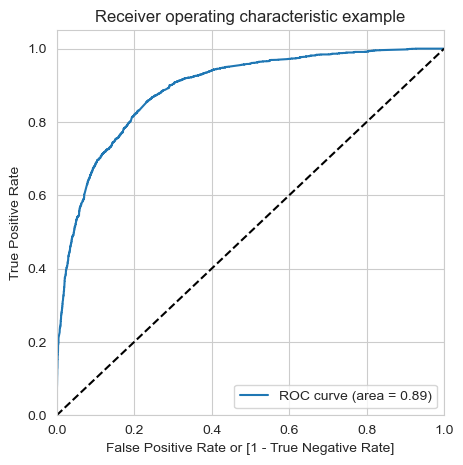

In [140]:
# Calling the ROC function

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.89 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

# Step 10: Finding Optimal cutoff point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity!!

In [141]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Leads ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.382744,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.197723,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.367693,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.878187,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.249792,3934,0,1,1,1,0,0,0,0,0,0,0


In [142]:
# Further calculating Accuracy Sensitivity and Specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.618275     0.972019     0.400300
0.2          0.2  0.760823     0.920519     0.662419
0.3          0.3  0.797928     0.862936     0.757871
0.4          0.4  0.809369     0.763179     0.837831
0.5          0.5  0.817563     0.698702     0.890805
0.6          0.6  0.812307     0.638686     0.919290
0.7          0.7  0.790043     0.531225     0.949525
0.8          0.8  0.764533     0.431062     0.970015
0.9          0.9  0.719233     0.285483     0.986507


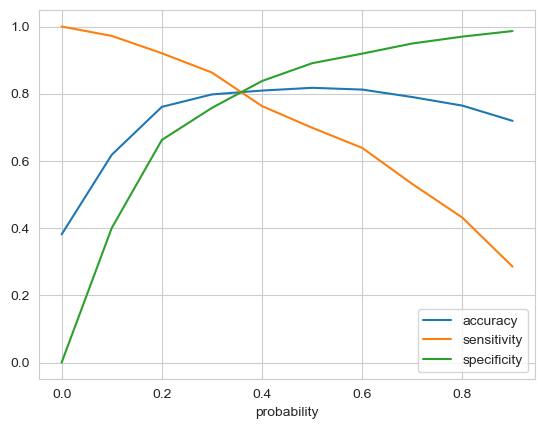

In [143]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

# Training Model's Performance

In [144]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Leads ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.382744,1871,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.197723,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.367693,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.878187,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.249792,3934,0,1,1,1,0,0,0,0,0,0,0,0


### Model's Accuracy is 80% on training set

In [145]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8084415584415584

In [146]:
# Again finding the confusion metrics after modifying new cutoff value.

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3225,  777],
       [ 462, 2004]])

In [147]:
# Putting values in specific matrix for further findings

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8126520681265207

In [149]:
# Let us calculate specificity
TN / float(TN+FP)

0.8058470764617691

In [150]:
# Calculate false postive rate - predicting conversion when customer have not converted
print(FP/ float(TN+FP))

0.19415292353823088


In [151]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8746948738812043


### Precision and Recall

#### Precision - Proportion of correctly predicted positive instances out of all instances that were predicted as positive
TP / TP + FP

In [152]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7206040992448759

#### Recall - Measures our model correctly identifying True Positives [ This is our evaluation metrics]
TP / TP + FN

In [153]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8126520681265207

In [154]:
from sklearn.metrics import precision_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7976851851851852

In [155]:
from sklearn.metrics import recall_score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6987023519870236

### Precision and recall tradeoff

In [156]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [157]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

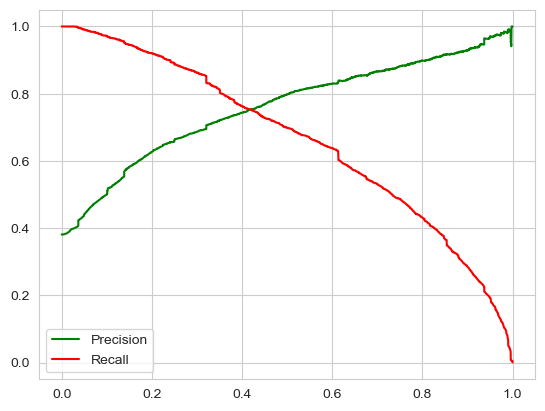

In [158]:
plt.plot(thresholds, p[:-1], "g-", label = 'Precision')
plt.plot(thresholds, r[:-1], "r-", label = 'Recall')
plt.legend()
plt.show()

# Step 11: Making predictions on the test set

In [159]:
X_test[['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']])

X_test[['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
4269,0.863900,0.964504,2.611381
2376,-0.645678,-0.885371,-1.088305
7766,0.297808,-0.777416,1.223999
9199,-0.645678,-0.885371,-1.088305
4359,-0.645678,-0.885371,-1.088305


In [160]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Specialization_Hospitality Management,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4269,0.964504,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
2376,-0.885371,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
7766,-0.777416,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
9199,-0.885371,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4359,-0.885371,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [161]:
X_test_sm = sm.add_constant(X_test)

In [162]:
# Making predictions on Test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.460654
2376    0.937752
7766    0.934379
9199    0.090925
4359    0.852459
9186    0.668897
1631    0.578769
8963    0.205811
8007    0.031253
5324    0.454957
dtype: float64

In [163]:
# Converting y_test_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.460654
2376,0.937752
7766,0.934379
9199,0.090925
4359,0.852459


In [164]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [165]:
# Putting Leads ID to index

y_test_df['Leads ID'] = y_test_df.index

In [166]:
# Removing index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Leads ID,0
0,1,4269,0.460654
1,1,2376,0.937752
2,1,7766,0.934379
3,0,9199,0.090925
4,1,4359,0.852459


In [168]:
# Renaming the column

y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [169]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Leads ID','Converted','Conversion_Prob'], axis=1)

In [170]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Leads ID,Converted,Conversion_Prob
0,4269,1,0.460654
1,2376,1,0.937752
2,7766,1,0.934379
3,9199,0,0.090925
4,4359,1,0.852459


In [188]:
# Making prediction by taking 0.35 as cutoff.

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Leads ID,Converted,Conversion_Prob,final_predicted
0,4269,1,0.460654,1
1,2376,1,0.937752,1
2,7766,1,0.934379,1
3,9199,0,0.090925,0
4,4359,1,0.852459,1


In [189]:
# Let's check the overall accuracy of Test_Set.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8088023088023089

In [190]:
# Check the confusion matrix for test set

confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion

array([[1359,  318],
       [ 212,  883]])

In [191]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [192]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.806392694063927

In [193]:
# Let us calculate specificity

TN / float(TN+FP)

0.8103756708407871

#### Precision

In [194]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7352206494587843

#### Recall [Evaluation Matrics]

In [195]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.806392694063927

In [179]:
###################################### END ################################################